In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
import random
import arviz as az
from scipy.stats import norm

## Road conditions

In [5]:
data = {'slippery': [True, False, True, True, False, False, True, True, False, False, False, True, False, False, True, False, True, False, False, True],
    'accident': [True, True, True, False, False, True, True, True, False, False, True, True, True, False, False, False, True, True, False, True]}

df_road = pd.DataFrame(data)

df_road

,slippery,accident
0,True,True
1,False,True
2,True,True
3,True,False
4,False,False
5,False,True
6,True,True
7,True,True
8,False,False
9,False,False


In [6]:
df_road.to_csv('road_conditions.csv', index=False)

In [15]:
#Unconditional probability of an accident
p_accident = df_road["accident"].mean()
print(p_accident)
# Unconditional probability of the road slippery
p_slippery = df_road["slippery"].mean()
print(p_slippery)
# Probability of the road slippery given there is an accident
p_slippery_given_accident = df_road.loc[df_road["accident"]]["slippery"].mean()
print(p_slippery_given_accident)
# Probability of an accident given the road is slippery
p_accident_given_slippery = p_slippery_given_accident * p_accident / p_slippery
print(p_accident_given_slippery)

0.6
0.45
0.5833333333333334
0.7777777777777778


In [17]:
p_accident_given_slippery=df_road.loc[df_road["slippery"]]["accident"].mean()
p_accident_given_slippery

0.7777777777777778

## Coin toss

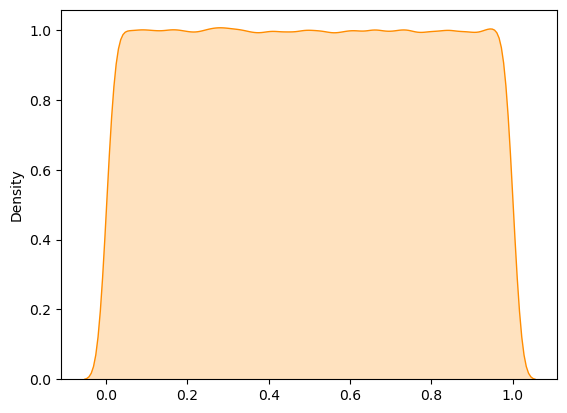

In [2]:
#draws=np.random.beta( 1,1, 1000000)
draws=np.random.beta( 1,1, 1000000)
sns.kdeplot(draws, shade=True, color='darkorange')
plt.show()

In [3]:
random.seed(3)
resultados=np.random.binomial(1, 0.5, size=10)
resultados

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [4]:

num_exitos = sum(resultados)
print('num_exitos',num_exitos)
total= len(resultados)

probabilidad_de_exito = num_exitos / total
probabilidad_de_exito

num_exitos 3


0.3

In [5]:
def get_heads_prob(d):
    num_success = np.sum(d)
    num_fail=len(d) - num_success
    # prior: Beta(1,1)
    return np.random.beta(num_success + 1, num_fail + 1, 10000)

<AxesSubplot:ylabel='Count'>

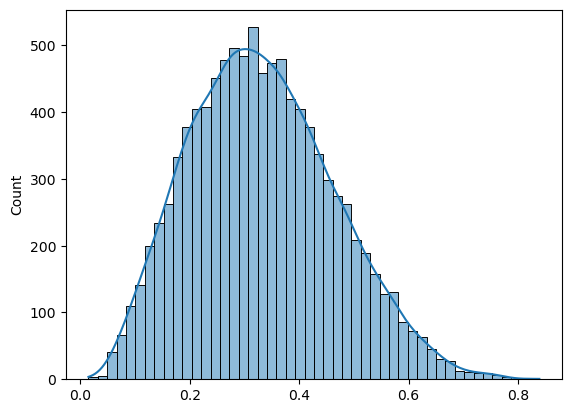

In [21]:
sns.histplot(get_heads_prob(resultados), kde=True)


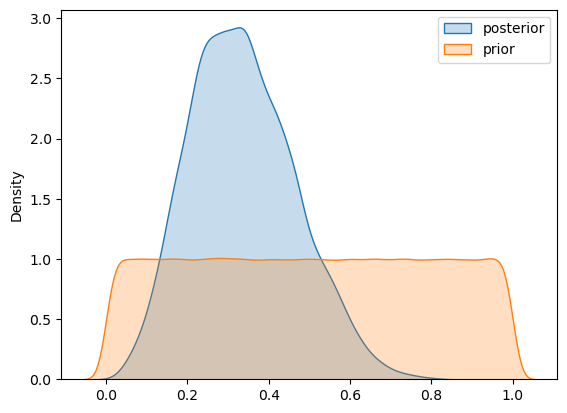

In [22]:
sns.kdeplot(get_heads_prob(resultados), shade=True, label='posterior')
sns.kdeplot(draws, shade=True,label='prior')
plt.legend()
plt.show()


num_exitos 54


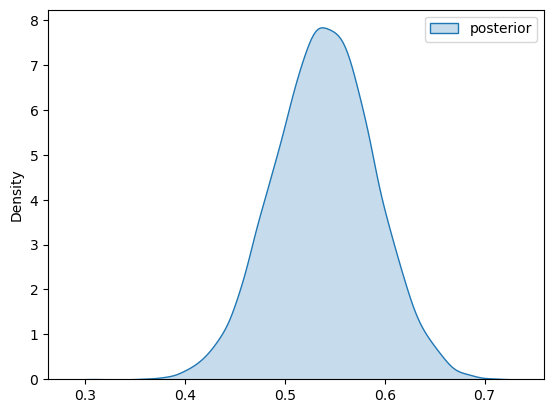

In [24]:
random.seed(11)
resultados=np.random.binomial(1, 0.5, size=100)
resultados

num_exitos = sum(resultados)
print('num_exitos',num_exitos)
total= len(resultados)

probabilidad_de_exito = num_exitos / total
probabilidad_de_exito

sns.kdeplot(get_heads_prob(resultados), shade=True, label='posterior')
#sns.kdeplot(draws, shade=True,label='prior')
plt.legend()
plt.show()


In [60]:
posterior_draws=get_heads_prob(resultados)
posterior_mean = np.mean(posterior_draws) 
posterior_median = np.median(posterior_draws)
posterior_p75 = np.percentile(posterior_draws,75)
print('posterior_mean',posterior_mean)
print('posterior_median',posterior_median)
print('posterior_p75',posterior_p75 )

posterior_mean 0.5392409806143683
posterior_median 0.5393131283466699
posterior_p75 0.5720274446096822


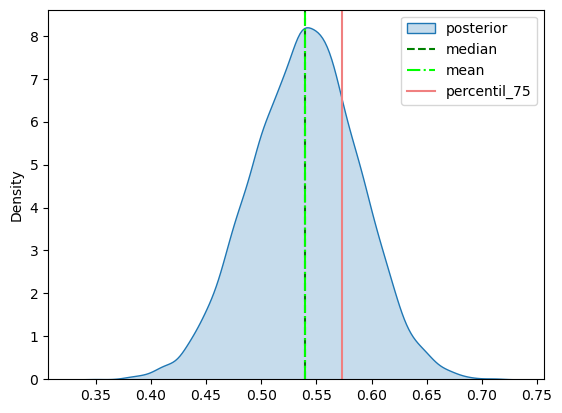

In [30]:
sns.kdeplot(posterior_draws, shade=True, label='posterior')
plt.axvline(x=posterior_median, color='green', linestyle='--', label='median')  
plt.axvline(x=posterior_mean, color='lime', linestyle='-.', label='mean') 
plt.axvline(x=posterior_p75, color='lightcoral', linestyle='-', label='percentil_75') 
plt.legend()
plt.show()


Intervalo de credibilidad al 95.0%: (0.443, 0.634)
Intervalo de credibilidad al 75.0%: (0.483, 0.596)


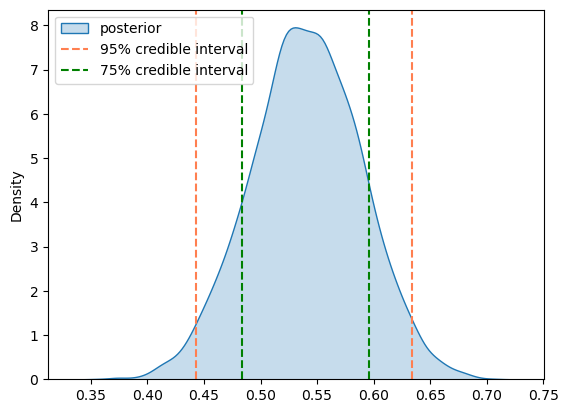

In [48]:
confidence_level_95=0.95
lower_percentile_95 = (1 - confidence_level_95) / 2
upper_percentile_95 = 1 - lower_percentile_95
lower_bound_95 = np.percentile(posterior_draws, lower_percentile_95 * 100)
upper_bound_95 = np.percentile(posterior_draws, upper_percentile_95 * 100)

print(f'Intervalo de credibilidad al {confidence_level_95*100}%: ({lower_bound_95:.3f}, {upper_bound_95:.3f})')

confidence_level_75=0.75
lower_percentile_75 = (1 - confidence_level_75) / 2
upper_percentile_75 = 1 - lower_percentile_75
lower_bound_75 = np.percentile(posterior_draws, lower_percentile_75 * 100)
upper_bound_75 = np.percentile(posterior_draws, upper_percentile_75 * 100)

print(f'Intervalo de credibilidad al {confidence_level_75*100}%: ({lower_bound_75:.3f}, {upper_bound_75:.3f})')


sns.kdeplot(posterior_draws, shade=True, label='posterior')
plt.axvline(x=lower_bound_95, color='coral', linestyle='--',label='95% credible interval')  
plt.axvline(x=upper_bound_95, color='coral', linestyle='--') 

plt.axvline(x=lower_bound_75, color='g', linestyle='--',label='75% credible interval')  
plt.axvline(x=upper_bound_75, color='g', linestyle='--') 

plt.legend(loc='upper left')
plt.show()

hpd [0.44538467 0.63549427]


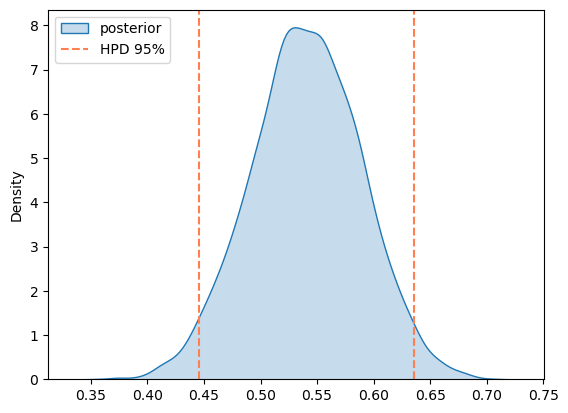

In [54]:
import arviz as az
hpd = az.hdi(posterior_draws, hdi_prob=0.95)
print('hpd',hpd)
sns.kdeplot(posterior_draws, shade=True, label='posterior')
plt.axvline(x=hpd[0], color='coral', linestyle='--',label='HPD 95%')  
plt.axvline(x=hpd[1], color='coral', linestyle='--') 
plt.legend(loc='upper left')
plt.show()

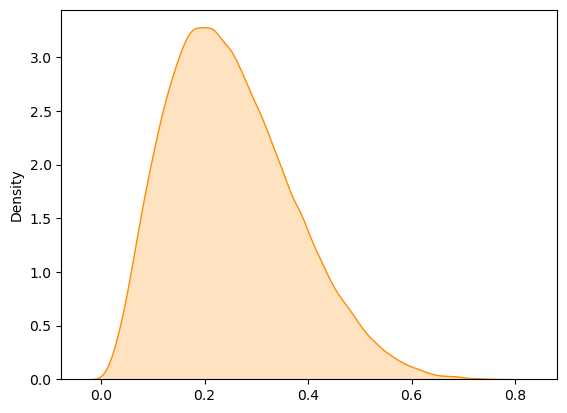

In [17]:
#draws=np.random.beta( 1,1, 1000000)
draws=np.random.beta( 3,9, 100000)
sns.kdeplot(draws, shade=True, color='darkorange')
plt.show()

hpd [0.0432339  0.48758527]


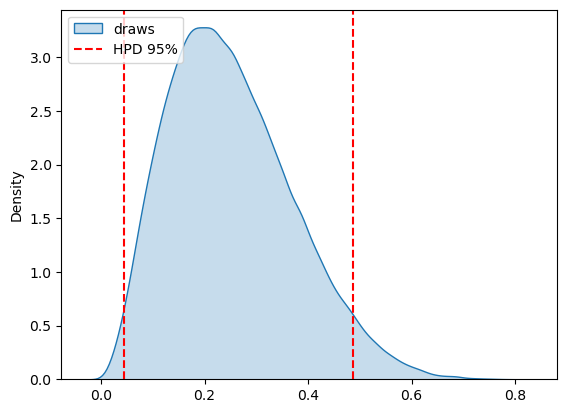

In [19]:
import arviz as az
hpd = az.hdi(draws, hdi_prob=0.95)
print('hpd',hpd)
sns.kdeplot(draws, shade=True, label='draws')
plt.axvline(x=hpd[0], color='r', linestyle='--',label='HPD 95%')  
plt.axvline(x=hpd[1], color='r', linestyle='--') 
plt.legend(loc='upper left')
plt.show()

Intervalo de credibilidad al 95.0%: (0.061, 0.518)


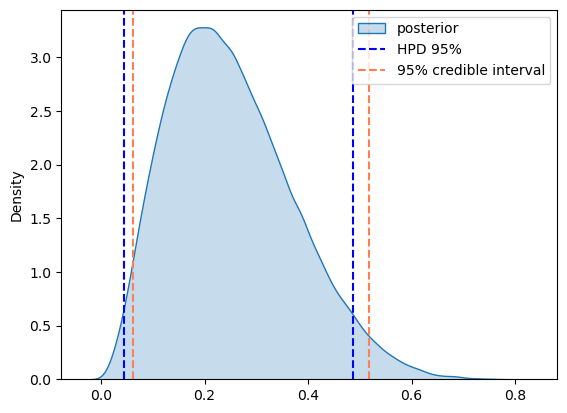

In [24]:
confidence_level_95=0.95
lower_percentile_95 = (1 - confidence_level_95) / 2
upper_percentile_95 = 1 - lower_percentile_95
lower_bound_95 = np.percentile(draws, lower_percentile_95 * 100)
upper_bound_95 = np.percentile(draws, upper_percentile_95 * 100)

print(f'Intervalo de credibilidad al {confidence_level_95*100}%: ({lower_bound_95:.3f}, {upper_bound_95:.3f})')



sns.kdeplot(draws, shade=True, label='posterior')
plt.axvline(x=hpd[0], color='b', linestyle='--',label='HPD 95%')  
plt.axvline(x=hpd[1], color='b', linestyle='--') 
plt.axvline(x=lower_bound_95, color='coral', linestyle='--',label='95% credible interval')  
plt.axvline(x=upper_bound_95, color='coral', linestyle='--') 

plt.legend(loc='upper right')
plt.show()

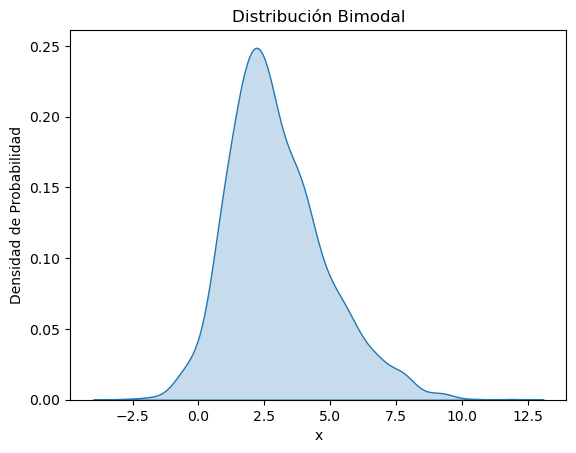

In [55]:
mu1, sigma1 = 2, 1 
mu2, sigma2 = 4, 2  

data1 = np.random.normal(mu1, sigma1, 1000)
data2 = np.random.normal(mu2, sigma2, 1000)

draws_bimodal = np.concatenate((data1, data2))

sns.kdeplot(draws_bimodal, shade=True)
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Bimodal')
#plt.legend()

plt.show()


In [56]:
# plt.hist(draws_bimodal, bins=30, density=True, alpha=0.6)
# plt.xlabel('x')
# plt.ylabel('Density')
# plt.title('Histogram of Bimodal Data')
# plt.show()

In [43]:
az.summary(draws_bimodal, kind="stats", round_to=2, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%
x,6.05,4.37,-0.21,12.75


<AxesSubplot:title={'center':'x'}>

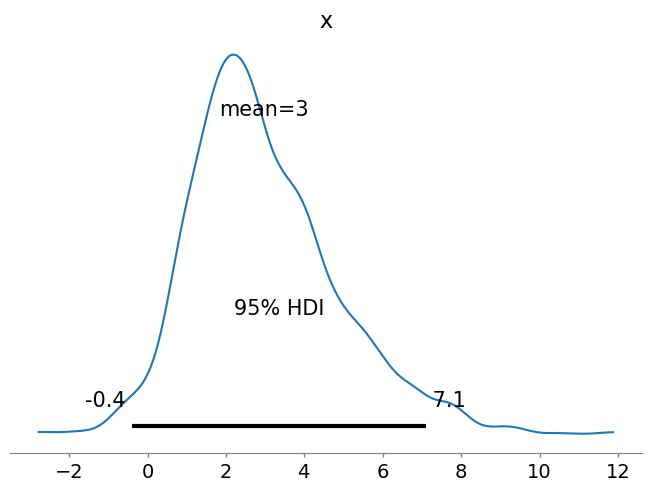

In [57]:
az.plot_posterior(draws_bimodal, hdi_prob=0.95, multimodal=True)

In [52]:
hpd_multi = az.hdi(draws_bimodal, hdi_prob=0.95,multimodal=True)
print('hpd_multi',hpd_multi)

hpd= az.hdi(draws_bimodal, hdi_prob=0.95)
print('hpd',hpd)

hpd_multi [[-0.52105513  4.59375372]
 [ 6.34740247 13.91001271]]
hpd [-0.21439578 12.7511642 ]


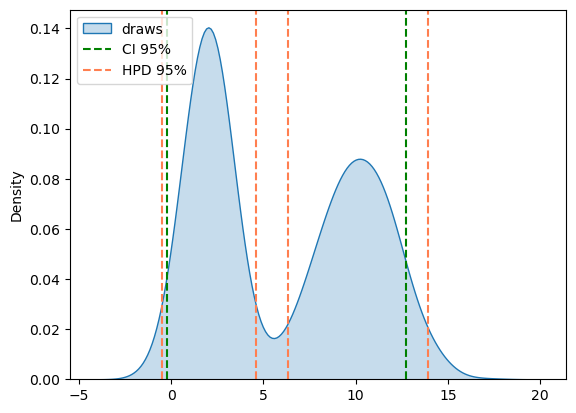

In [53]:
sns.kdeplot(draws_bimodal, shade=True, label='draws')
plt.axvline(x=hpd[0], color='green', linestyle='--',label='CI 95%')  
plt.axvline(x=hpd[1], color='green', linestyle='--') 

plt.axvline(x=hpd_multi[0][0], color='coral', linestyle='--',label='HPD 95%')  
plt.axvline(x=hpd_multi[0][1], color='coral', linestyle='--') 
plt.axvline(x=hpd_multi[1][0], color='coral', linestyle='--') 
plt.axvline(x=hpd_multi[1][1], color='coral', linestyle='--') 
plt.legend(loc='upper left')
plt.show()